In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
list_mean, list_covMat, X, Y, Z = playground()
N_tourbillons_cat = 2000
N_obs = 100
N_pred = 20

Text(0.5, 1.0, 'playground')

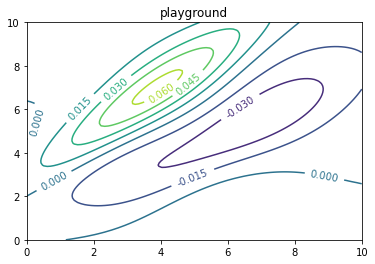

In [3]:
catalogue = generer_catalogue(N_tourbillons_cat, list_mean, list_covMat)
observations = generer_catalogue(N_obs, list_mean, list_covMat)[:,0,:]

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
CS = ax.contour(X, Y, Z.T)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('playground')

In [4]:
true_values = list_true_value(catalogue, list_mean, list_covMat, 20, observations)

(0.0, 10.0)

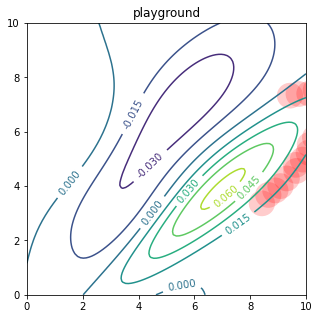

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ax = plot_trajectory(true_values[0], ax)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('playground')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

In [6]:
observations.shape

(100, 10)

In [7]:
x = true_values[0,0:2].reshape(1,-1)

(0.0, 10.0)

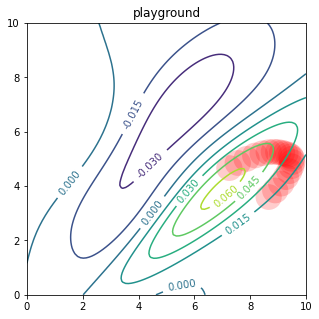

In [9]:
mat_pred = list_prediction(catalogue, 20, x, locally_incremental_mean, k=50)
fig, ax = plt.subplots(figsize=(5,5))
ax = plot_trajectory(mat_pred[0], ax)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('playground')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

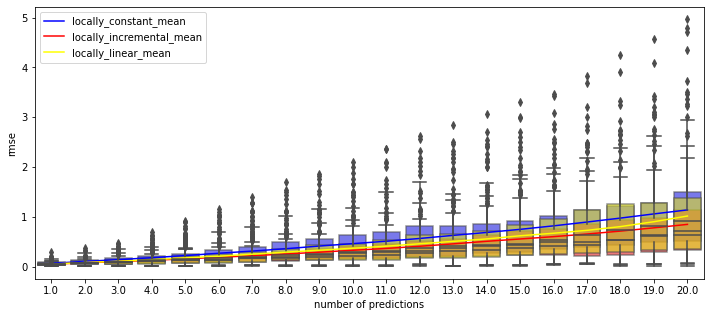

In [11]:
names = ["locally_constant_mean","locally_incremental_mean","locally_linear_mean"]
methods = [locally_constant_mean, locally_incremental_mean, locally_linear_mean]
colors = ["blue", "red", "yellow"]

fig, ax = plt.subplots(figsize=(12,5))

for i in range(len(names)):
    predictions = list_prediction(catalogue, N_pred, observations, methods[i], k=50)
    predictions = predictions[:,:,5:]

    rmse = AnDA_RMSE(predictions,true_values)
    time = np.arange(rmse.shape[1])+1
    times = np.stack([time]*rmse.shape[0], axis=0)
    rmse_times = np.stack([rmse, times], axis=-1)
    df = rmse_times.reshape((-1,2))
    rmse_df = pd.DataFrame(df, columns=["rmse", "number of predictions"])
    plt.plot(np.arange(rmse.shape[1]), rmse.mean(axis=0), color=colors[i], label=names[i])
    sns.boxplot(x="number of predictions", y="rmse", data=rmse_df, color=colors[i], ax=ax, boxprops=dict(alpha=.6))
plt.legend()


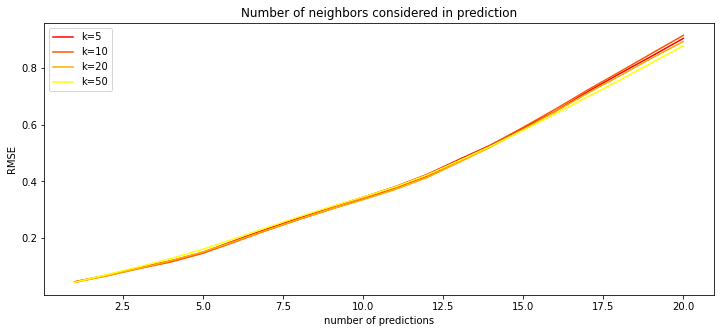

In [19]:
from matplotlib import cm

k = [5,10,20,50]
colors = cm.get_cmap("autumn")(np.linspace(0, 1, len(k)))
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title("Number of neighbors considered in prediction")
ax.set_xlabel("number of predictions")
ax.set_ylabel("RMSE")

for i in range(len(k)):
    predictions = list_prediction(catalogue, N_pred, observations, locally_incremental_mean, k[i])
    predictions = predictions[:,:,5:]

    rmse = AnDA_RMSE(predictions,true_values)
    plt.plot(1+np.arange(rmse.shape[1]), rmse.mean(axis=0), color=colors[i], label="k=%i"%(k[i]))
plt.legend()

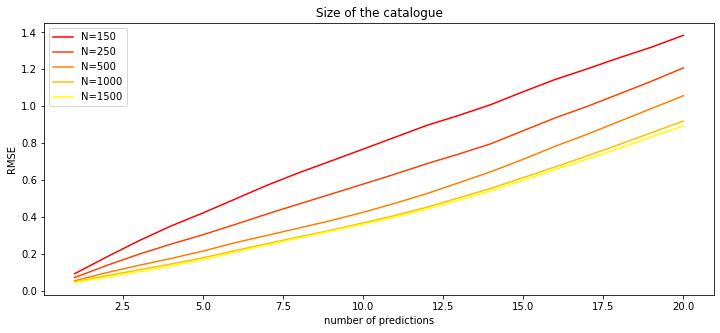

In [24]:
N = [150,250,500,1000,1500]
colors = cm.get_cmap("autumn")(np.linspace(0, 1, len(N)))
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title("Size of the catalogue")
ax.set_xlabel("number of predictions")
ax.set_ylabel("RMSE")

for i in range(len(N)):
    predictions = list_prediction(catalogue[:N[i]], N_pred, observations, locally_incremental_mean, k=50)
    predictions = predictions[:,:,5:]

    rmse = AnDA_RMSE(predictions,true_values)
    plt.plot(np.arange(1,rmse.shape[1]+1), rmse.mean(axis=0), color=colors[i], label="N=%i"%(N[i]))
plt.legend()